In [1]:
# Import the dependencies. - 6.1.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. - [Unpacking the zipped tuple.]
coordinates = list(lat_lngs)

In [4]:
# Import citipy.
from citipy import citipy

In [5]:
# Create a list for holding the cities. - 6.1.5
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import Requests Library and weather_api_key 6.2.6
import requests
from config import weather_api_key

In [7]:
# Build the basic URL for the OpenWeatherMay with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list to get teh index of the city for logging.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | east london
Processing Record 2 of Set 13 | mountain home
Processing Record 3 of Set 13 | fairbanks
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | port moresby
Processing Record 6 of Set 13 | banjar
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | port blair
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | esperance
Processing Record 12 of Set 13 | new norfolk
Processing Record 13 of Set 13 | auki
Processing Record 14 of Set 13 | artyk
City not found. Skipping...
Processing Record 15 of Set 13 | riyadh
Processing Record 16 of Set 13 | souillac
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | yen bai
Processing Record 19 of Set 13 | jacksonville
Processing Record 20 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 13 | cariamanga
P

Processing Record 37 of Set 16 | egvekinot
Processing Record 38 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 16 | temaraia
City not found. Skipping...
Processing Record 40 of Set 16 | huajuapan
City not found. Skipping...
Processing Record 41 of Set 16 | vao
Processing Record 42 of Set 16 | haines junction
Processing Record 43 of Set 16 | vallenar
Processing Record 44 of Set 16 | asau
Processing Record 45 of Set 16 | marrakesh
Processing Record 46 of Set 16 | pevek
Processing Record 47 of Set 16 | meulaboh
Processing Record 48 of Set 16 | gorno-chuyskiy
City not found. Skipping...
Processing Record 49 of Set 16 | goderich
Processing Record 50 of Set 16 | flin flon
Processing Record 1 of Set 17 | nandu
Processing Record 2 of Set 17 | beyla
Processing Record 3 of Set 17 | hukuntsi
Processing Record 4 of Set 17 | airai
Processing Record 5 of Set 17 | lajas
Processing Record 6 of Set 17 | yerbogachen
Processing Record 7 of Set 17 | udimskiy
Processing Rec

Processing Record 19 of Set 20 | hasaki
Processing Record 20 of Set 20 | gambela
Processing Record 21 of Set 20 | fort dodge
Processing Record 22 of Set 20 | poyarkovo
Processing Record 23 of Set 20 | contamana
Processing Record 24 of Set 20 | okahandja
Processing Record 25 of Set 20 | clyde river
Processing Record 26 of Set 20 | sao joao da barra
Processing Record 27 of Set 20 | beringovskiy
Processing Record 28 of Set 20 | setermoen
Processing Record 29 of Set 20 | shelburne
Processing Record 30 of Set 20 | kungurtug
Processing Record 31 of Set 20 | san policarpo
Processing Record 32 of Set 20 | talcahuano
Processing Record 33 of Set 20 | porbandar
Processing Record 34 of Set 20 | genhe
Processing Record 35 of Set 20 | ko samui
Processing Record 36 of Set 20 | am timan
Processing Record 37 of Set 20 | nuuk
Processing Record 38 of Set 20 | olinda
Processing Record 39 of Set 20 | mumford
Processing Record 40 of Set 20 | mbaiki
Processing Record 41 of Set 20 | kamariotissa
Processing Re

Processing Record 6 of Set 24 | griffith
Processing Record 7 of Set 24 | teahupoo
Processing Record 8 of Set 24 | harnosand
Processing Record 9 of Set 24 | troitskoye
Processing Record 10 of Set 24 | guzelyurt
Processing Record 11 of Set 24 | tessalit
Processing Record 12 of Set 24 | maniitsoq
Processing Record 13 of Set 24 | port augusta
Processing Record 14 of Set 24 | french harbor
Processing Record 15 of Set 24 | rio gallegos
Processing Record 16 of Set 24 | quimper
Processing Record 17 of Set 24 | bolshegrivskoye
City not found. Skipping...
Processing Record 18 of Set 24 | miri
Processing Record 19 of Set 24 | oranjestad
Processing Record 20 of Set 24 | valparaiso
Processing Record 21 of Set 24 | huanren
Processing Record 22 of Set 24 | touros
Processing Record 23 of Set 24 | ashford
Processing Record 24 of Set 24 | bhairab bazar
Processing Record 25 of Set 24 | australind
Processing Record 26 of Set 24 | shetpe
Processing Record 27 of Set 24 | hobyo
Processing Record 28 of Set 24

In [10]:
# Print the city count to confirm sufficient count.
len(cities)

623

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame-6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,67.14,72,20,11.50,ZA,2021-08-07 14:47:53
1,Mountain Home,43.1330,-115.6912,63.34,39,1,6.91,US,2021-08-07 14:47:54
2,Fairbanks,64.8378,-147.7164,60.10,93,90,6.91,US,2021-08-07 14:46:55
3,Jamestown,42.0970,-79.2353,78.51,73,40,4.61,US,2021-08-07 14:47:54
4,Port Moresby,-9.4431,147.1797,74.62,88,90,11.50,PG,2021-08-07 14:47:54
5,Banjar,-8.1900,114.9675,80.46,88,100,2.37,ID,2021-08-07 14:47:55
6,Ushuaia,-54.8000,-68.3000,31.66,93,90,28.77,AR,2021-08-07 14:44:34
7,Port Blair,11.6667,92.7500,80.64,83,75,4.61,IN,2021-08-07 14:47:05
8,Bluff,-46.6000,168.3333,35.80,65,100,6.08,NZ,2021-08-07 14:47:55
9,Carnarvon,-24.8667,113.6333,68.07,90,90,9.22,AU,2021-08-07 14:47:56


In [45]:
# Reorder the columns from city_data_df.
# new_columns = ["column2","column9","column10","column3","column4","column5","column6","column7","column8"]
# new_columns
new_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_columns

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [46]:
city_data_df = city_data_df[new_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-08-07 14:47:53,-33.0153,27.9116,67.14,72,20,11.50
1,Mountain Home,US,2021-08-07 14:47:54,43.1330,-115.6912,63.34,39,1,6.91
2,Fairbanks,US,2021-08-07 14:46:55,64.8378,-147.7164,60.10,93,90,6.91
3,Jamestown,US,2021-08-07 14:47:54,42.0970,-79.2353,78.51,73,40,4.61
4,Port Moresby,PG,2021-08-07 14:47:54,-9.4431,147.1797,74.62,88,90,11.50
...,...,...,...,...,...,...,...,...,...
570,Tambacounda,SN,2021-08-07 14:51:21,13.7539,-13.7586,87.85,79,75,9.22
571,Macomb,US,2021-08-07 14:51:21,40.4592,-90.6718,77.79,81,49,8.08
572,Wanning,CN,2021-08-07 14:51:22,18.8003,110.3967,82.81,83,100,4.52
573,Bom Jesus,BR,2021-08-07 14:51:22,-9.0744,-44.3586,89.35,29,0,11.45


In [47]:
# Create the output file (CSV).
output_data_file = "C:/Users/myric/UCF_Projects/Mod_6/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

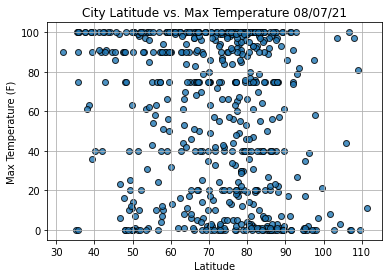

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:/Users/myric/UCF_Projects/Mod_6/weather_data/Fig1.png")

# Show plot.
plt.show()

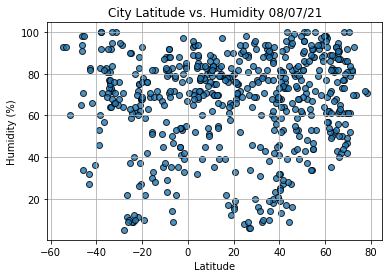

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/myric/UCF_Projects/Mod_6/weather_data/Fig2.png")
# Show plot.
plt.show()

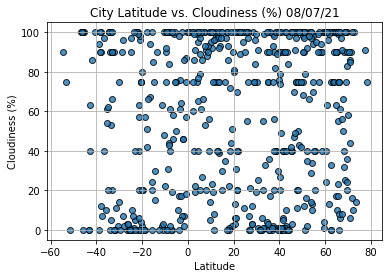

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/myric/UCF_Projects/Mod_6/weather_data/Fig3.png")
# Show plot.
plt.show()

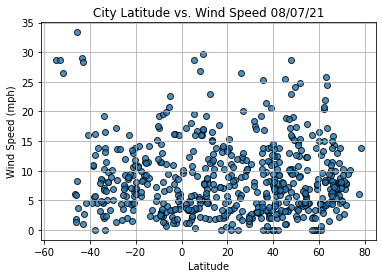

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/myric/UCF_Projects/Mod_6/weather_data/Fig4.png")
# Show plot.
plt.show()